Successfully loaded data points.
Starting...
--------------------------------
Calculated slope (m): 1.0150
Calculated intercept (b): -0.0245
Equation: y = 1.02x + -0.02
--------------------------------
Prediction for 2500 sq ft: $429560.41


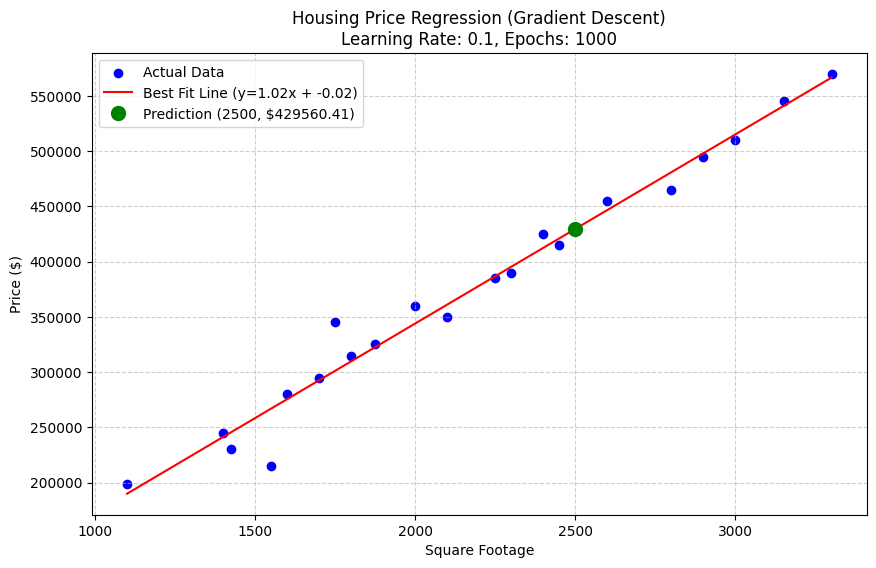

In [6]:
# Shivam Sah 240979
import numpy as np
import matplotlib.pyplot as plt
import csv

raw_x = []
raw_y = []

with open('housing_prices.csv', 'r') as file:
    reader = csv.reader(file)
    next(reader)

    for row in reader:
        if row:
            sq_ft = float(row[0])
            pr = float(row[1])

            raw_x.append(sq_ft)
            raw_y.append(pr)

print(f"Successfully loaded data points.")

X = np.array(raw_x)
Y = np.array(raw_y)

# normalizing X and Y b/w 0 and 1 to prevent exploding gradient
X_min, X_max = np.min(X), np.max(X)
Y_min, Y_max = np.min(Y), np.max(Y)
X_scaled = (X-X_min)/(X_max-X_min)
Y_scaled = (Y-Y_min)/(Y_max-Y_min)

learning_rate = 0.1
epochs = 1000

# m and b
m_scaled = 0
b_scaled = 0
n = len(X)

cost_history = []

print("Starting...")
for i in range(epochs):
    # forward pass
    y_pred = m_scaled * X_scaled + b_scaled

    # calculating gradients (p.d. of MSE)
    # D_m = (-2/n)*sum(x*(y - y_pred))
    # D_b = (-2/n)*sum(y - y_pred)

    error = Y_scaled - y_pred
    D_m = (-2/n)*np.sum(X_scaled*error)
    D_b = (-2/n)*np.sum(error)

    # new parameters
    m_scaled = m_scaled - (learning_rate*D_m)
    b_scaled = b_scaled - (learning_rate*D_b)

    # saving mse
    cost = np.mean(error ** 2)
    cost_history.append(cost)

target_area = 2500
input_scaled = (target_area - X_min) / (X_max - X_min)
# predict
prediction_scaled = m_scaled*input_scaled + b_scaled
predicted_price = prediction_scaled*(Y_max - Y_min) + Y_min # denormalize
print("-"*32)
print(f"Calculated slope (m): {m_scaled:.4f}")
print(f"Calculated intercept (b): {b_scaled:.4f}")
print(f"Equation: y = {m_scaled:.2f}x + {b_scaled:.2f}")
print("-" * 32)
print(f"Prediction for {target_area} sq ft: ${round(predicted_price, 2)}")

y_line_scaled = m_scaled * X_scaled + b_scaled
y_line_original = y_line_scaled * (Y_max - Y_min) + Y_min

plt.figure(figsize=(10, 6))

plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, y_line_original, color='red', label=f'Best Fit Line (y={m_scaled:.2f}x + {b_scaled:.2f})')
plt.plot(target_area, predicted_price, 'go', markersize=10, label=f'Prediction ({target_area}, ${round(predicted_price, 2)})')
plt.title(f'Housing Price Regression (Gradient Descent)\nLearning Rate: {learning_rate}, Epochs: {epochs}')
plt.xlabel('Square Footage')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()